# Visualizing the ROC curve

In [31]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import utils
from custom_colors import blue_shades

In [51]:
STORE = False
# STORE = True

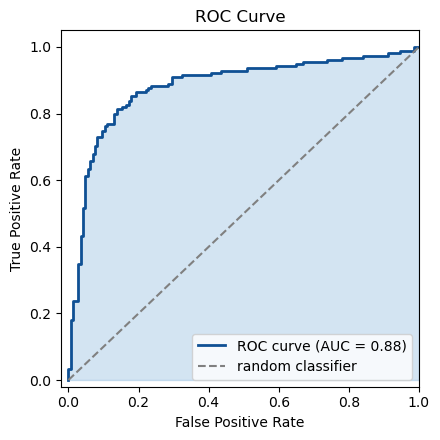

In [52]:
# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=250, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=43, max_depth=2)
clf.fit(X_train, y_train)

# Get predicted probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with shaded area
plt.figure(figsize=(4.5, 4.5))
plt.plot(fpr, tpr, color=blue_shades[4], lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color=blue_shades[3])
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="random classifier")  # Diagonal line
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()

if STORE:
    plt.savefig(os.getenv("OUTPUT_DIR") + "/roc-curve.pdf", format="pdf", bbox_inches="tight")

plt.show()